In [21]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
plt.style.use(hep.style.NA62)
plt.rc('legend',fontsize=12)
import CEDAR_Parameters as Cpm
importlib.reload(Cpm)
import UsefulFunctions as Ufunc
importlib.reload(Cpm)
from scipy.integrate import quad
from scipy.stats import poisson
CEDARH = Cpm.CEDARH()
UF = Ufunc.UsefulFunctions(CEDARH)

In [16]:
filename = "Cedar_data/data.abs.2.txt"

In [17]:
def ELConvert(value):
  return  1.239841 / value


In [18]:
events = []
splitted = []
eventno = 0

with open(filename) as f:
    for line in f:
        if "=" in line.split(",")[0]:
            events.append(splitted)
            splitted = []
            print(eventno, end="\r")
            eventno += 1
            continue
        splitted.append(line.split(","))

In [19]:
count_z = []  
waves = []
angle  = []

#fig01, ax01 = plt.subplots(1, 1, figsize=(10, 10))

for t in range(len(events)):  
    max_ = 0
    min_ = 9999999
    count=0
    previd = -99
    for i in range(len(events[t])):
        z = float(events[t][i][2])
        e = float(events[t][i][9])
        x = float(events[t][i][0])
        y = float(events[t][i][1])
        _id = int(events[t][i][5])
        prevol = str(events[t][i][7])
        x1 = float(events[t][i][10])
        y1 = float(events[t][i][11])
        z1 = float(events[t][i][12])
        waves.append(ELConvert(e*1e6)*1e3)
        
        if previd != _id and "CedarRadiatorGas" in prevol:
            data_x = [x,x1]
            data_y = [y,y1]
            data_z = [z,z1]
            
            #ax01.plot(data_y,data_x)
            #if t==1:
                #ax01.plot(data_z,data_x)
                
            dist_x = x1-x
            dist_z = z1-z
            if (dist_z > 0):
                angle.append(np.arctan(dist_x/dist_z))
            
            #print(z)
            count+=1
            if z > max_:
                max_ = z
            if z < min_:
                min_ = z
        
        previd = _id
            
    print("####################")
    print(min_,max_)        
    diff = (max_-min_)/1000
    print(diff)
    print(count)
    print(count/diff)
    if count/diff < 100:
        continue
    count_z.append(count/diff)

####################
70198.6392 75295.4959
5.096856699999989
970
190.313374908108
####################
70202.5456 75296.8678
5.0943222000000095
958
188.05249499138438
####################
70201.1322 75280.1621
5.079029900000009
986
194.13156043834243
####################
70219.3663 75298.4296
5.0790633000000085
1006
198.06801777800217
####################
70213.3084 75281.3744
5.068066000000006
972
191.7891361320075
####################
70201.2766 75288.0037
5.086727100000004
949
186.56396959058395
####################
70199.9503 75293.8658
5.093915500000003
938
184.14125636752306
####################
70198.2989 75295.2571
5.096958200000008
996
195.41066669920863
####################
70208.8184 75293.9553
5.0851368999999975
900
176.98638555827287
####################
70210.7757 75298.8312
5.088055500000002
992
194.9664267616577
####################
70201.0623 75296.8727
5.095810400000002
1012
198.59451599690593
####################
70206.1716 75289.9438
5.083772199999992
948
186.475704

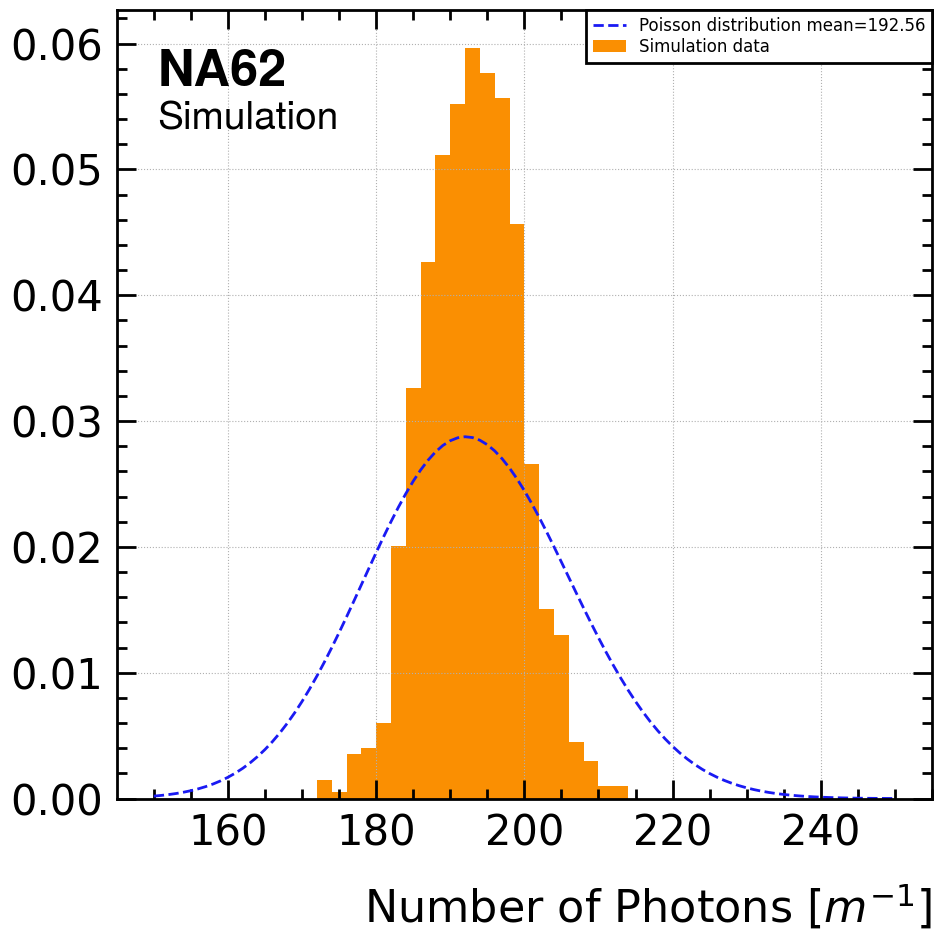

In [22]:
fig02, ax02 = plt.subplots(1, 1, figsize=(10, 10))
I = quad(UF.Tamm, 180e-9, 700e-9)
t = np.linspace(150, 250, 101)
data = poisson.pmf(t,I[0])
ax02.plot(t,data,"--", label="Poisson distribution mean={:.2f}".format(I[0]))
ax02.hist(count_z,bins=50,range=(150,250),density=True, label="Simulation data")
ax02.set_xlabel("Number of Photons [$m^{-1}$]")
hep.na62.text("Simulation")
plt.legend()
plt.grid()
plt.show()